# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
# load datasets
import pandas as pd
import matplotlib.pyplot as plt

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [2]:
df_08.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no


In [3]:
df_18.head(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,15.0,20.0,17.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,17.0,22.0,19.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,16.0,24.0,19.0,6,No


In [4]:
df_08.shape

(987, 13)

In [5]:
df_18.shape

(870, 13)

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [6]:
df_08['fuel'].value_counts()

Gasoline    984
gas           1
CNG           1
ethanol       1
Name: fuel, dtype: int64

In [7]:
df_18['fuel'].value_counts()

Gasoline       725
Gas             52
Ethanol         50
Electricity     24
Diesel          19
Name: fuel, dtype: int64

In [8]:
nuique_08 = df_08.query('fuel in ["ethanol", "CNG"]').model.nunique()

In [9]:
nuique18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()

Text(0.5,0,'Year')

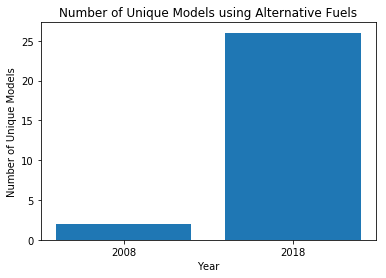

In [10]:
plt.bar(['2008', '2018'], [nuique_08, nuique18])
plt.title('Number of Unique Models using Alternative Fuels')
plt.ylabel('Number of Unique Models')
plt.xlabel('Year')

In [11]:
(26-2)/ 26 * 100

92.3076923076923

### Q2: How much have vehicle classes improved in fuel economy?  

In [12]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [13]:
df_08_ = df_08.groupby('veh_class').city_mpg.mean()

In [14]:
df_18_ = df_18.groupby('veh_class').city_mpg.mean()

In [15]:
rate = df_18_ - df_08_
rate

veh_class
SUV                     NaN
large car          1.504062
midsize car       -0.870184
minivan            1.566667
pickup             3.219456
small SUV               NaN
small car         -1.553085
special purpose         NaN
standard SUV            NaN
station wagon     -2.244689
van                     NaN
Name: city_mpg, dtype: float64

In [16]:
rate.dropna(inplace=True)

In [17]:
rate.index

Index(['large car', 'midsize car', 'minivan', 'pickup', 'small car',
       'station wagon'],
      dtype='object', name='veh_class')

Text(0,0.5,'Average Improvemnt (cmp_mpg)')

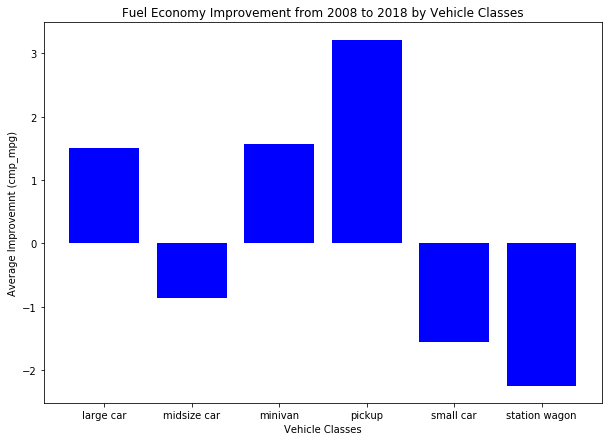

In [18]:
plt.subplots(figsize=(10, 7))
plt.bar(rate.index, rate, color=['blue'])
plt.title('Fuel Economy Improvement from 2008 to 2018 by Vehicle Classes')
plt.xlabel('Vehicle Classes')
plt.ylabel('Average Improvemnt (cmp_mpg)')

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [19]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [20]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [21]:
df_08.query('smartway == "no"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,607.000000,607.000000,607.000000,565.000000,565.000000,565.000000,607.000000
mean,4.056837,6.771005,6.293245,15.111504,21.318584,17.300885,4.149918
std,1.203933,1.882335,0.551479,2.605224,3.386104,2.797811,1.629634
min,1.300000,2.000000,4.000000,8.000000,13.000000,10.000000,0.000000
25%,3.200000,6.000000,6.000000,13.000000,19.000000,15.000000,3.000000
50%,3.800000,6.000000,6.000000,15.000000,21.000000,18.000000,5.000000
75%,4.900000,8.000000,7.000000,17.000000,24.000000,19.000000,5.000000
max,8.400000,16.000000,9.500000,21.000000,28.000000,23.000000,7.000000


In [22]:
df_08.query('smartway == "yes"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,305.000000,305.000000,305.000000,380.000000
mean,2.602895,4.826316,7.365789,20.983607,28.386885,23.724590,6.868421
std,0.623436,1.002025,1.148195,3.298184,3.137395,2.975152,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,31.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,40.000000,45.000000,42.000000,10.000000


In [23]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [24]:
df_18.query('smartway == "No"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,3.320296,5.763441,3.795699,17.139785,23.810484,19.530914,4.248656
std,1.343167,1.753430,1.711707,4.069627,4.753730,4.245382,1.286119
min,1.400000,3.000000,1.000000,8.000000,13.000000,10.000000,1.000000
25%,2.000000,4.000000,3.000000,14.000000,20.000000,16.000000,3.000000
50%,3.000000,6.000000,3.000000,17.000000,24.000000,19.000000,4.000000
75%,4.000000,6.000000,5.000000,20.000000,27.000000,22.000000,5.000000
max,8.000000,16.000000,7.000000,40.000000,45.000000,42.000000,10.000000


In [25]:
df_18.query('smartway == "Yes"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1.755208,3.916667,4.718750,17.197917,23.354167,19.479167,7.718750
std,0.413679,0.451119,1.775287,3.712340,4.472087,3.901361,1.002136
min,1.200000,3.000000,3.000000,12.000000,16.000000,14.000000,7.000000
25%,1.500000,4.000000,3.000000,14.000000,19.000000,16.000000,7.000000
50%,1.600000,4.000000,5.000000,17.000000,24.000000,19.500000,7.000000
75%,2.000000,4.000000,7.000000,20.000000,26.000000,22.000000,8.000000
max,3.500000,6.000000,7.000000,29.000000,33.000000,29.000000,10.000000


In [26]:
df_18.query('smartway == "Elite"').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,30.00000,30.0,30.0,30.000000,30.000000,30.000000,30.0
mean,1.95000,4.0,7.0,17.833333,24.866667,20.333333,10.0
std,0.24033,0.0,0.0,3.404696,4.591847,3.817684,0.0
min,1.50000,4.0,7.0,12.000000,16.000000,13.000000,10.0
25%,2.00000,4.0,7.0,16.000000,23.000000,19.000000,10.0
50%,2.00000,4.0,7.0,17.500000,24.000000,20.000000,10.0
75%,2.00000,4.0,7.0,18.750000,26.750000,21.750000,10.0
max,2.50000,4.0,7.0,28.000000,37.000000,31.000000,10.0


### Q4: What features are associated with better fuel economy?

In [27]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [28]:
num_colums = []
for coln in df_08.columns:
    if df_08[coln].dtypes == float:
        num_colums.append(coln)

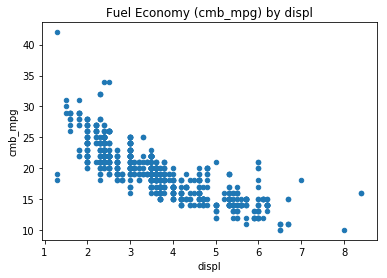

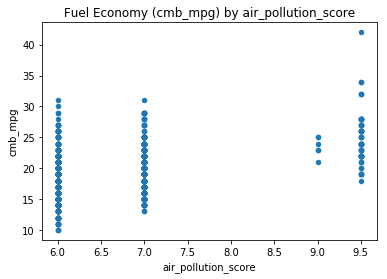

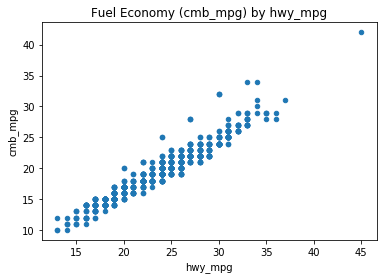

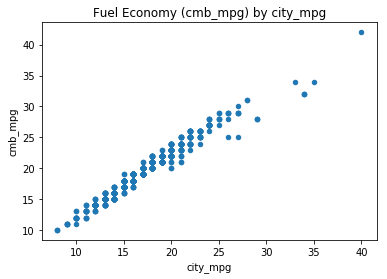

In [29]:
num_colums = ['displ', 'air_pollution_score', 'hwy_mpg', 'city_mpg']
for column in num_colums:
    df_08.plot(x=column, y='cmb_mpg', kind='scatter')
    plt.title(f'Fuel Economy (cmb_mpg) by {column}')